# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
# Inspect the shapes of the datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

num_classes = len(class_names)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
y_train_cat = to_categorical(y_train, num_classes=num_classes)

print(y_test_cat[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


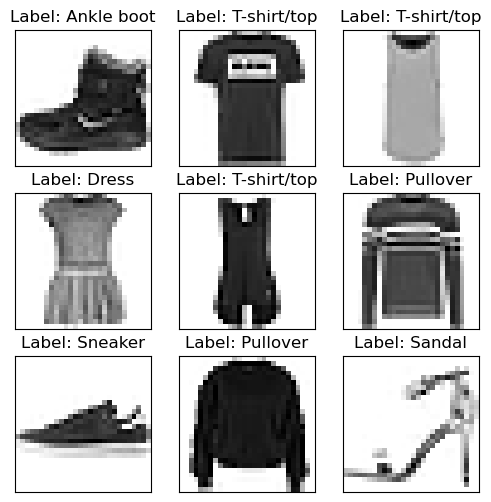

In [20]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {class_names[y_train[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**There are weird details in the data, such as high heels being categorized as sandals, very little difference between pullovers and tshirt, tshirts and tops being categorized together where images can be very different. As for the quality of the images, they are not exactly high resolution, but items can be distinguishable.**

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()

# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10))

# Compile the model using `model.compile()`
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model with `model.evaluate()`
model.evaluate(X_test, y_test_cat)

/home/nicolas/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-06 16:08:34.521285: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NOT_INITIALIZED: initialization error
2025-07-06 16:08:34.521343: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: aurora
2025-07-06 16:08:34.521351: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: aurora
2025-07-06 16:08:34.521573: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 575.64.0
2025-07-06 16:08:34.521605: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170

Epoch 1/5


2025-07-06 16:08:35.019771: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1464/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.1685 - loss: 10.3039

2025-07-06 16:08:36.751468: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1684 - loss: 10.2984 - val_accuracy: 0.1774 - val_loss: 9.9114
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.1736 - loss: 10.0694 - val_accuracy: 0.1848 - val_loss: 8.9295
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.1904 - loss: 9.7696 - val_accuracy: 0.2268 - val_loss: 8.4768
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.2356 - loss: 7.9974 - val_accuracy: 0.2591 - val_loss: 8.1235
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.2472 - loss: 9.2965 - val_accuracy: 0.2593 - val_loss: 10.1275
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.2466 - loss: 10.1796


[10.085091590881348, 0.2508000135421753]

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Performance is at 24.66%, I didn't expect much of it, but around 25% seems kind of low, I probably expected around 45-55% accuracy. I believe the performance is low because it requires more iterations, or simply because a linear regression model is not fit for this kind of problem.**

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [24]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test, y_test_cat)

/home/nicolas/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2025-07-06 16:22:28.362756: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1491/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8078 - loss: 0.5463

2025-07-06 16:22:34.112671: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8081 - loss: 0.5455 - val_accuracy: 0.8838 - val_loss: 0.3335
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8927 - loss: 0.2994 - val_accuracy: 0.8882 - val_loss: 0.3087
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9097 - loss: 0.2536 - val_accuracy: 0.8953 - val_loss: 0.2925
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9207 - loss: 0.2239 - val_accuracy: 0.8943 - val_loss: 0.3025
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9277 - loss: 0.2012 - val_accuracy: 0.9012 - val_loss: 0.2848
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9007 - loss: 0.2944


[0.2925844192504883, 0.8964999914169312]

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**The CNN model at 90% accuracy performed way better than the baseline model, which was at less than 25%, I'd say the bigger improvement is using a model that's specifically designed for classifying images.**

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [ ]:
# A. Test Hyperparameters
loss_results = []
acc_results = []

# 1. Testing filter size
filter_sizes = [32, 64, 128, 256, 512]
for i in filter_sizes:
    # Create a simple CNN model
    model = Sequential()
    model.add(Conv2D(i, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
    loss_results.append({f'filter_size_{i}': test_loss})
    acc_results.append({f'filter_size_{i}': test_accuracy})


# 2. Testing kernel size
kernel_sizes = [(3, 3), (5, 5), (7, 7), (9, 9), (11, 11)]
for i in kernel_sizes:
    # Create a simple CNN model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=i, activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
    loss_results.append({f'kernel_size{i}': test_loss})
    acc_results.append({f'kernel_size{i}': test_accuracy})

print(loss_results)
print(acc_results)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8074 - loss: 0.5457 - val_accuracy: 0.8819 - val_loss: 0.3320
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8962 - loss: 0.2900 - val_accuracy: 0.8948 - val_loss: 0.2936
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9119 - loss: 0.2470 - val_accuracy: 0.8904 - val_loss: 0.3026
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9238 - loss: 0.2146 - val_accuracy: 0.8937 - val_loss: 0.2954
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9291 - loss: 0.1963 - val_accuracy: 0.8997 - val_loss: 0.2884
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8959 - loss: 0.3026
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8120 - loss: 0.5267 - val_accuracy: 0.8768 - val_loss: 0.3433
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8959 - loss: 0.2860 - val_accuracy: 0.8887 - val_loss: 0.3083
Epoch 3/5
1500/1500 ━━

In [29]:
# 3. Adding more layers
from keras.layers import Dropout, MaxPooling2D

loss_results = []
acc_results = []

model_a = Sequential()
model_a.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_a.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_a.add(Flatten())
model_a.add(Dense(10, activation='softmax'))
model_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_a.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model_a.evaluate(X_test, y_test_cat)
loss_results.append({f'model_a': test_loss})
acc_results.append({f'model_a': test_accuracy})

model_b = Sequential()
model_b.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_b.add(Dropout(0.5))
model_b.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_b.add(Dropout(0.5))
model_b.add(Flatten())
model_b.add(Dense(10, activation='softmax'))
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_b.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model_b.evaluate(X_test, y_test_cat)
loss_results.append({f'model_b': test_loss})
acc_results.append({f'model_b': test_accuracy})

model_c = Sequential()
model_c.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_c.add(MaxPooling2D((2, 2)))
model_c.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_c.add(MaxPooling2D((2, 2)))
model_c.add(Flatten())
model_c.add(Dense(10, activation='softmax'))
model_c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_c.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model_c.evaluate(X_test, y_test_cat)
loss_results.append({f'model_c': test_loss})
acc_results.append({f'model_c': test_accuracy})

model_d = Sequential()
model_d.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_d.add(MaxPooling2D((2, 2)))
model_d.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_d.add(MaxPooling2D((2, 2)))
model_d.add(Flatten())
model_d.add(Dense(64, activation='relu'))
model_d.add(Dropout(0.5))
model_d.add(Dense(10, activation='softmax'))
model_d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_d.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model_d.evaluate(X_test, y_test_cat)
loss_results.append({f'model_d': test_loss})
acc_results.append({f'model_d': test_accuracy})

print(loss_results)
print(acc_results)

/home/nicolas/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8110 - loss: 0.5301 - val_accuracy: 0.8852 - val_loss: 0.3162
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9029 - loss: 0.2696 - val_accuracy: 0.8995 - val_loss: 0.2693
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9263 - loss: 0.2040 - val_accuracy: 0.9120 - val_loss: 0.2516
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9442 - loss: 0.1564 - val_accuracy: 0.9047 - val_loss: 0.2800
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9579 - loss: 0.1193 - val_accuracy: 0.9155 - val_loss: 0.2641
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.2739
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7890 - loss: 0.6028 - val_accuracy: 0.8736 - val_loss: 0.3469
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8831 - loss: 0.3299 - val_accuracy: 0.8964 - val_loss: 0.2892
Epoch 3/

In [ ]:
# B. Test presence or absence of regularization
loss_results = []
acc_results = []

# 1. Testing dropout
dropout = [0, 0.25, 0.5, 0.75]
for i in dropout:
    # Create a simple CNN model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Dropout(i))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
    loss_results.append({f'dropout{i}': test_loss})
    acc_results.append({f'dropout{i}': test_accuracy})

print(loss_results)
print(acc_results)

/home/nicolas/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8014 - loss: 0.5589 - val_accuracy: 0.8782 - val_loss: 0.3323
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8926 - loss: 0.3016 - val_accuracy: 0.8879 - val_loss: 0.3136
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9063 - loss: 0.2614 - val_accuracy: 0.8947 - val_loss: 0.2981
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9131 - loss: 0.2387 - val_accuracy: 0.8974 - val_loss: 0.2985
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9262 - loss: 0.2044 - val_accuracy: 0.8973 - val_loss: 0.3028
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8908 - loss: 0.3251
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8060 - loss: 0.5562 - val_accuracy: 0.8711 - val_loss: 0.3574
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8916 - loss: 0.3034 - val_accuracy: 0.8884 - val_loss: 0.3136
Epoch 3/5
1500/1500 ━━

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**From my experiments, a few changes made the model perform better, such as having an extra conv2d layer, no regularization, a filter_size of 128 and a kernel size of 5. I didn't exactly combine changes together, but I'm gonna test a combination of the best params in the final model.**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [30]:
# 2 layers of cond2d, filter_size is 128 (both layers), kernel size of 5 (both layers), no regularization
model_final = Sequential()
model_final.add(Conv2D(128, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_final.add(Conv2D(128, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_final.add(Flatten())
model_final.add(Dense(10, activation='softmax'))
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_final.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model_final.evaluate(X_test, y_test_cat)
print(test_loss, test_accuracy)

/home/nicolas/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 76ms/step - accuracy: 0.8012 - loss: 0.5460 - val_accuracy: 0.8836 - val_loss: 0.3164
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 119s 79ms/step - accuracy: 0.8918 - loss: 0.2972 - val_accuracy: 0.8893 - val_loss: 0.3044
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 120s 80ms/step - accuracy: 0.9150 - loss: 0.2317 - val_accuracy: 0.9065 - val_loss: 0.2697
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 122s 81ms/step - accuracy: 0.9307 - loss: 0.1875 - val_accuracy: 0.9066 - val_loss: 0.2672
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 121s 81ms/step - accuracy: 0.9454 - loss: 0.1505 - val_accuracy: 0.9035 - val_loss: 0.2728
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8961 - loss: 0.3187
0.30513516068458557 0.8978999853134155


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**My best model combined different hyperparameter tunning that separately improved the model performance even by a little; however, in combination, they didn't improve performance that much, performance is basically the same as the initial CNN model, but definitely way better than the baseline. If I had more time, I would combine the tunning of multiple hyperparams in combination, instead of just testing them separately, although I might need better hardware or learn how to get tensorflow to use my nvidia gpu to perform faster.**

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.